# Hand Position

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


### Loading the data

In [2]:
spontan1 = pd.read_csv('Training/spontan/Evyatar636771052727603804Spontan.csv')
spontan2 = pd.read_csv('Training/spontan/Nofar636759795182793299Spontan.csv')
spontan3 = pd.read_csv('Training/spontan/Oriya636759804404113837Spontan.csv')
spontan4 = pd.read_csv('Training/spontan/OryaB636771083605535985Spontan.csv')
spontan5 = pd.read_csv('Training/spontan/Revital636770957038873193Spontan.csv')
spontan6 = pd.read_csv('Training/spontan/Sachar636771045591258071Spontan.csv')
spontan7 = pd.read_csv('Training/spontan/Shelly636759787508979097Spontan.csv')
spontan8 = pd.read_csv('Training/spontan/Yael636771059544754823Spontan.csv')
spontan9 = pd.read_csv('Training/spontan/Yoel636760921663075813Spontan.csv')

In [3]:
sync1 = pd.read_csv('Training/synchron/Evyatar636771053639929594Sync.csv')
sync2 = pd.read_csv('Training/synchron/Nofar636759797397919664Sync.csv')
sync3 = pd.read_csv('Training/synchron/Oriya636759806131350399Sync.csv')
sync4 = pd.read_csv('Training/synchron/OryaB636771084494502229Sync.csv')
sync5 = pd.read_csv('Training/synchron/Revital636770957894370062Sync.csv')
sync6 = pd.read_csv('Training/synchron/Sachar636771046527112972Sync.csv')
sync7 = pd.read_csv('Training/synchron/Shelly636759789526313406Sync.csv')
sync8 = pd.read_csv('Training/synchron/Yael636771060699529085Sync.csv')
sync9 = pd.read_csv('Training/synchron/Yoel636760923490742912Sync.csv')


In [4]:
alone1 = pd.read_csv('Training/alone/Evyatar636771054555711409Alone.csv')
alone2 = pd.read_csv('Training/alone/Nofar636759796290435160Alone.csv')
alone3 = pd.read_csv('Training/alone/Oriya636759805268396661Alone.csv')
alone4 = pd.read_csv('Training/alone/OryaB636771082736601528Alone.csv')
alone5 = pd.read_csv('Training/alone/Revital636770955999435879Alone.csv')
alone6 = pd.read_csv('Training/alone/Sachar636771047408504303Alone.csv')
alone7 = pd.read_csv('Training/alone/Shelly636759788383205274Alone.csv')
alone8 = pd.read_csv('Training/alone/Yael636771061659067649Alone.csv')
alone9 = pd.read_csv('Training/alone/Yoel636760922573364655Alone.csv')

In [5]:
HandRight = pd.read_csv('HandRight.csv')
HandRight.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


### setting the data

In [8]:
def setData(df):
    
    #combine left & right frames to one row:
    right = df[df[' Hand Type'] == 'right'].drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    left =  df[df[' Hand Type'] == 'left'].drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[400::10],new[401::10],new[402::10]], axis=0)
    
    return helper(new2)

In [9]:
def setDataAlone(df):
    
    #combine left & right frames to one row:
    right = HandRight.drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    left =  df.drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[400::10],new[401::10],new[402::10]], axis=0)
    
    return helper(new2)

In [10]:
#split the data to 3 for combine 3 frames represent half a second:

def helper (df):
    temp1 = df[::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp2 = df[1::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp3 = df[2::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp1.reset_index(inplace=True)
    temp2.reset_index(inplace=True)
    temp3.reset_index(inplace=True)
    temp1.columns += "_1"
    temp2.columns += "_2"
    temp3.columns += "_3"
    new = pd.concat([temp1 ,temp2, temp3], axis=1).drop('index_1', axis=1).drop('index_2', axis=1).drop('index_3', axis=1).drop('index_r_1', axis=1).drop('index_r_2', axis=1).drop('index_r_3', axis=1).drop('index_l_1', axis=1).drop('index_l_2', axis=1).drop('index_l_3', axis=1)
    return new

In [11]:
spontan1_new = setData(spontan1)
spontan2_new = setData(spontan2)
spontan3_new = setData(spontan3)
spontan4_new = setData(spontan4)
spontan5_new = setData(spontan5)
spontan6_new = setData(spontan6)
spontan7_new = setData(spontan7)
spontan8_new = setData(spontan8)
spontan9_new = setData(spontan9)
spontan1_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,155.9359,208.1284,-31.21712,-7.383640,-21.33287,10.729240,0.711794,-0.223330,-0.492625,190.4225,...,1.423037,-157.1487,149.38500,-0.618898,-346.6033,-15.103640,18.492440,0.000000,1.848656,0.000000
1,152.2292,202.9817,-38.93669,-54.424640,-12.95077,-59.022220,0.423059,-0.202610,-0.671734,200.2654,...,1.462609,-182.0708,246.31910,-43.225910,-341.2279,51.422580,-45.801470,0.000000,0.604686,0.000000
2,137.9564,218.0768,-50.62793,-86.060680,249.16450,-53.437310,-0.166540,0.094672,-0.966643,198.6915,...,1.177055,-158.5114,203.69530,2.489781,-326.3594,61.280860,124.570900,0.000000,0.880775,0.000000
3,133.7394,203.2745,-43.36188,-1.947313,-180.81940,30.110430,-0.303800,0.077965,-1.141567,199.3707,...,1.603383,-148.1970,112.13250,-9.837838,-388.5125,44.977680,23.752270,0.000000,1.273378,0.000000
4,137.3772,223.3892,-53.89438,105.609500,237.77940,103.531800,0.539820,-0.201573,-0.924800,196.0714,...,1.554989,-186.6472,173.32750,-3.301782,-364.8102,-3.374418,-23.892280,0.369080,1.344474,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,122.6834,306.5341,-41.47635,47.902100,508.53750,58.921860,0.935821,-0.580744,-0.782863,164.1447,...,1.450034,-145.4945,90.98325,55.297280,-362.7469,-18.927880,90.092350,0.000000,0.117480,0.000000
409,127.7196,205.6805,-28.82113,-60.682290,-284.75700,-3.183362,0.187868,-0.345170,-0.203957,155.0228,...,1.174199,-152.1578,153.36140,33.538330,-390.6072,99.927060,7.192961,0.896132,1.903579,1.000000
410,138.3531,339.6367,-15.39577,59.475700,181.51530,70.514950,0.910747,-0.515148,-0.355658,165.2662,...,1.311606,-168.0458,153.40230,15.624570,-305.6251,-49.775950,29.695370,0.000000,1.033350,0.000000
411,136.1530,223.3871,-33.01790,-107.654000,-88.08487,-66.518630,0.787340,-0.652436,-0.482716,167.1406,...,1.424348,-164.7706,116.00480,44.298840,-300.1183,-88.631150,29.718390,0.000000,0.706513,0.066154


In [12]:
sync1_new = setData(sync1)
sync2_new = setData(sync2)
sync3_new = setData(sync3)
sync4_new = setData(sync4)
sync5_new = setData(sync5)
sync6_new = setData(sync6)
sync7_new = setData(sync7)
sync8_new = setData(sync8)
sync9_new = setData(sync9)

sync1_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,71.94101,251.4637,-6.907072,53.091940,-40.25596,97.66138,0.658722,-1.646524,-0.170360,89.38186,...,0.546841,-110.49300,223.7677,42.10865,-255.4824,22.60431,44.076510,0.0,0.000000,0.0
1,115.45030,208.8553,73.208280,-124.844600,-161.77310,83.72779,0.895653,-1.411911,-0.374659,141.01320,...,1.397060,-137.64040,120.9963,63.44971,-303.6956,-63.16230,61.494080,0.0,0.000000,0.0
2,28.09907,196.1127,66.696390,-169.509200,108.62330,-72.66647,1.153516,-1.534858,-0.394824,48.71676,...,1.239161,-222.56710,177.1946,42.22416,-322.7169,-49.65889,42.229520,0.0,0.000000,0.0
3,-58.56152,242.0672,52.675370,-9.174218,19.55542,20.98059,1.156664,-1.475011,-0.489461,-33.85064,...,1.059245,-134.42960,194.7682,57.40747,-270.2995,-12.67145,58.243930,0.0,0.000000,0.0
4,117.45010,220.9867,40.628610,491.166600,-237.68460,-47.95924,1.099921,-1.391134,-0.434181,139.47780,...,1.124206,-47.36527,155.4832,51.55155,-248.2692,11.54979,31.221000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,118.14870,210.8634,153.277800,-66.161990,-100.04850,127.51140,1.956078,-1.218917,-2.383795,148.90500,...,2.074002,-132.05700,154.5669,71.74404,-305.6773,-16.60806,6.903108,0.0,0.000000,0.0
409,128.30720,217.6384,102.614400,-13.839850,-55.46097,-210.75640,1.163967,-1.396786,-0.721135,158.21530,...,0.886262,-126.96010,131.8572,54.23330,-349.3086,21.44941,9.283110,0.0,0.087991,0.0
410,121.54640,198.3387,63.578330,148.636400,157.17250,191.92270,0.693786,-1.763640,-0.574998,158.10750,...,1.504783,-143.00860,175.7696,72.89594,-346.0262,27.09764,54.736660,0.0,0.014903,0.0
411,114.55990,205.2793,156.739200,-58.783780,-44.24956,-94.46384,1.937684,-1.241404,-2.299070,149.44970,...,1.672499,-154.38500,101.3325,93.10945,-320.4811,-88.56555,92.866440,0.0,0.140191,0.0


In [13]:
alone1_new = setDataAlone(alone1)
alone2_new = setDataAlone(alone2)
alone3_new = setDataAlone(alone3)
alone4_new = setDataAlone(alone4)
alone5_new = setDataAlone(alone5)
alone6_new = setDataAlone(alone6)
alone7_new = setDataAlone(alone7)
alone8_new = setDataAlone(alone8)
alone9_new = setDataAlone(alone9)

alone2_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,4.446011,239.7163,7.214328,65.369930,-429.516700,-52.87744,0.141979,-0.006587,-0.949935,69.77336,...,1.766450,-93.14972,247.2314,31.190850,-299.2039,110.08510,-38.949710,0.571452,2.546834,0.072133
1,9.759008,151.3201,-4.327604,-46.536010,-67.596130,-106.04750,-0.289657,0.176762,-0.865124,70.35112,...,1.541197,-83.43033,103.9663,6.786192,-340.4403,93.67231,1.591831,0.000000,0.875465,0.000000
2,-7.348337,270.6730,-4.626692,6.725562,-188.174600,59.26298,0.168860,-0.073883,-0.785574,50.99613,...,1.655295,-84.21605,203.5038,12.572340,-307.3401,80.86944,-24.475670,0.000000,0.958193,0.000000
3,-6.920549,183.3948,-9.706382,0.680243,-303.663800,135.70700,-0.080909,0.039870,-0.790196,51.97974,...,1.525567,-82.54382,186.6201,26.403830,-325.0397,112.55510,-15.904560,0.000000,0.000000,0.000000
4,13.216970,124.3669,34.967890,19.565940,-321.822100,72.52114,-0.156647,0.088060,-0.654787,64.69829,...,1.922988,-85.94032,149.9715,155.898400,-323.5967,85.23740,82.823830,0.000000,0.015172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.815705,209.6899,-10.792580,-115.595400,-4.467873,89.77375,0.473223,0.579208,-0.023089,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,-18.922190,149.0452,-0.983002,-196.860900,-1360.551000,104.44910,-0.150978,-0.058372,-0.089673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,-19.837060,266.2280,8.367677,35.815910,-1402.998000,-212.01620,0.322127,0.016442,-0.132688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,37.485670,328.1625,38.908720,553.217300,-200.523900,179.99720,0.729167,-1.716032,0.412734,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### adding a label column:

In [14]:
spontan1_new['label'] = 1
spontan2_new['label'] = 1
spontan3_new['label'] = 1
spontan4_new['label'] = 1
spontan5_new['label'] = 1
spontan6_new['label'] = 1
spontan7_new['label'] = 1
spontan8_new['label'] = 1
spontan9_new['label'] = 1

In [15]:
sync1_new['label'] = 2
sync2_new['label'] = 2
sync3_new['label'] = 2
sync4_new['label'] = 2
sync5_new['label'] = 2
sync6_new['label'] = 2
sync7_new['label'] = 2
sync8_new['label'] = 2
sync9_new['label'] = 2

In [16]:
alone1_new['label'] = 3
alone2_new['label'] = 3
alone3_new['label'] = 3
alone4_new['label'] = 3
alone5_new['label'] = 3
alone6_new['label'] = 3
alone7_new['label'] = 3
alone8_new['label'] = 3
alone9_new['label'] = 3

### combine all the data-frames to big data

In [17]:
hands_arr = [alone1_new, alone2_new, alone3_new, alone4_new, alone5_new, alone6_new, alone7_new, alone8_new, alone9_new,
       sync1_new, sync2_new, sync3_new, sync4_new, sync5_new, sync6_new, sync7_new, sync8_new, sync9_new,
       spontan1_new, spontan2_new, spontan3_new, spontan4_new, spontan5_new, spontan6_new, spontan7_new, spontan8_new, spontan9_new]
hands = pd.concat(hands_arr, axis=0)

from sklearn.utils import shuffle
hands = shuffle(hands)
hands.reset_index(inplace=True)
hands = hands.drop('index', axis=1)
hands

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3,label
0,67.34585,249.0412,3.111234,116.188800,319.60290,127.25200,0.516869,-1.853215,0.236716,59.542180,...,-145.54870,157.6304,26.297530,-323.5559,-5.553866,68.172050,0.163814,1.234910,0.000000,3
1,70.84821,200.0665,24.498910,-115.332400,-35.30334,54.62568,1.157885,-1.094316,-0.964023,111.982800,...,-139.96490,109.8718,11.289560,-287.0999,-92.227530,-9.712173,0.000000,0.085346,0.000000,2
2,108.85620,215.5363,66.239120,5.259034,-103.74240,105.39130,0.336285,-1.510923,-0.358732,142.292200,...,-135.05330,131.8908,9.377212,-350.3228,76.948760,127.873400,0.000000,0.000000,0.000000,2
3,41.55383,321.7231,58.114320,88.459470,-167.50070,42.13127,0.479369,0.133846,-0.044122,56.083750,...,-137.31220,161.4529,35.271820,-275.1862,-30.483480,-54.328220,0.000000,1.171825,0.422607,3
4,120.96890,200.9203,27.363850,76.141640,-138.41490,340.84950,0.824360,-1.574944,-0.189662,138.769700,...,-190.10220,147.3326,68.218800,-393.8126,-0.978364,56.306510,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10949,171.96910,241.3929,31.396370,-98.180860,-123.34590,-121.35940,0.720344,-1.320127,-0.576574,208.814500,...,-97.86485,106.1991,59.169610,-317.5621,-11.943380,45.225910,0.000000,0.029219,0.000000,2
10950,156.46510,225.0745,123.495500,-76.056900,-125.36150,-159.28480,1.244825,-1.008611,-0.567103,183.282400,...,-118.22340,170.2571,122.723200,-286.5149,-23.684490,121.169900,0.000000,0.000000,0.000000,2
10951,-21.38645,279.3406,76.330240,-1.621353,-42.94775,-663.21480,1.269097,-0.067027,-0.320209,-1.778319,...,-143.57850,172.4096,34.097760,-271.5494,-29.898630,88.322210,1.000000,3.141593,0.920023,3
10952,135.03520,285.4733,-29.537080,20.690470,72.52867,128.24300,0.854509,-0.555950,-0.571339,170.471200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [18]:
hands.isnull().sum()

 Position X_r_1         42
 Position Y_r_1         42
 Position Z_r_1         42
 Velocity X_r_1         42
 Velocity Y_r_1         42
                      ... 
 Elbow Pos Z_l_3       579
 Grab Strenth_l_3      579
 Grab Angle_l_3        579
 Pinch Strength_l_3    579
label                    0
Length: 109, dtype: int64

In [19]:
hands = hands.dropna()

In [20]:
hands.isnull().values.any()

False

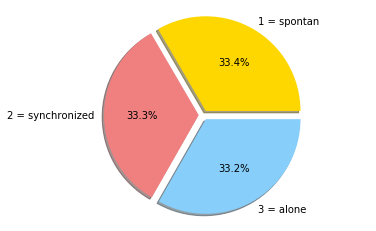

In [21]:
# lets look at the predict variable:

spontan = hands[hands['label']==1]['label'].count()
sync = hands[hands['label']==2]['label'].count()
alone = hands[hands['label']==3]['label'].count()


# Data to plot
labels = "1 = spontan", "2 = synchronized" , "3 = alone"
sizes = [spontan, sync , alone]
colors = ['gold', 'lightcoral', 'lightskyblue']
# 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()

## loading the testing set


In [22]:
spontan_test1 = pd.read_csv('Validation/spontan/Itiel636770940701219076Spontan.csv')
spontan_test2 = pd.read_csv('Validation/spontan/Mor636771064635567065Spontan.csv')
spontan_test3 = pd.read_csv('Validation/spontan/Oded636754667262994505Spontan.csv')

In [23]:
sync_test1 = pd.read_csv('Validation/synchron/Itiel636770941638547912Sync.csv')
sync_test2 = pd.read_csv('Validation/synchron/Mor636771065531910215Sync.csv')
sync_test3 = pd.read_csv('Validation/synchron/Oded636754671560850581Sync.csv')

In [24]:
alone_test1 = pd.read_csv('Validation/alone/Itiel636770939529673940Alone.csv')
alone_test2 = pd.read_csv('Validation/alone/Mor636771066407626524Alone.csv')
alone_test3 = pd.read_csv('Validation/alone/Oded636754669540564461Alone.csv')

### setting the data

In [25]:
spontan_test1_new = setData(spontan_test1)
spontan_test2_new = setData(spontan_test2)
spontan_test3_new = setData(spontan_test3)

spontan_test1_new['label'] = 1
spontan_test2_new['label'] = 1
spontan_test3_new['label'] = 1

In [26]:
sync_test1_new = setData(sync_test1)
sync_test2_new = setData(sync_test2)
sync_test3_new = setData(sync_test3)

sync_test1_new['label'] = 2
sync_test2_new['label'] = 2
sync_test3_new['label'] = 2

In [27]:
alone_test1_new = setDataAlone(alone_test1)
alone_test2_new = setDataAlone(alone_test2)
alone_test3_new = setDataAlone(alone_test3)

alone_test1_new['label'] = 3
alone_test2_new['label'] = 3
alone_test3_new['label'] = 3

### combine all the data-frames to big data


In [28]:
hands_test_arr = [alone_test1_new, alone_test2_new, alone_test3_new,
       sync_test1_new, sync_test2_new, sync_test3_new,
       spontan_test1_new, spontan_test2_new, spontan_test3_new]
hands_test = pd.concat(hands_test_arr, axis=0)
from sklearn.utils import shuffle

hands_test = shuffle(hands_test)
hands_test.reset_index(inplace=True)
hands_test = hands_test.drop('index', axis=1)
hands_test

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3,label
0,-3.166207,275.6382,5.296783,49.666130,-680.34440,529.262800,-0.513672,2.300805,0.608044,-50.73458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,116.175900,242.1220,16.133930,227.886900,-536.44870,353.863200,-0.077850,0.938646,0.084112,114.15630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,108.932400,268.6172,77.899220,57.175570,-80.06739,-199.533000,1.241626,-1.195043,-0.718048,136.71080,...,-194.26060,151.1501,88.50086,-422.8823,140.23810,161.43250,0.0,0.000000,0.0,2
3,105.410200,202.6775,4.189260,-45.530770,-247.64230,55.078480,0.148370,-1.839213,0.185988,101.88390,...,-167.67790,142.8195,118.54740,-288.7521,-62.94055,113.83770,0.0,0.000000,0.0,2
4,127.883700,283.2957,92.164710,-106.093400,161.47670,205.040600,1.315686,-1.355670,-0.651786,149.08410,...,-188.96300,167.1005,74.05161,-324.2295,-29.09945,104.88180,0.0,0.274040,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,13.349860,215.9528,-20.906390,163.757000,39.96373,-3.002151,0.926726,-1.071997,-0.054043,26.30636,...,-116.86380,169.1992,20.76413,-255.2701,-29.74516,37.37743,0.0,0.000000,0.0,3
3336,132.765900,185.1948,21.536200,-31.522830,203.39720,-8.040296,0.383887,-0.026057,-1.523794,202.23070,...,-108.18770,128.5755,23.33507,-277.5068,-32.82898,112.41130,0.0,0.000000,0.0,2
3337,43.397490,114.4584,3.225155,-1.381135,-122.69030,-29.911610,0.229453,-2.693324,0.404814,13.23216,...,-147.52250,155.6984,42.26292,-353.9530,66.82581,132.03370,0.0,0.513135,0.0,3
3338,104.721400,198.7639,4.837752,-38.181720,-228.13950,39.908470,0.136010,-1.819272,0.183830,101.50590,...,-166.67390,141.2374,119.55230,-284.7213,-66.13853,110.69920,0.0,0.000000,0.0,2


In [29]:
hands_test.isnull().sum()

 Position X_r_1          1
 Position Y_r_1          1
 Position Z_r_1          1
 Velocity X_r_1          1
 Velocity Y_r_1          1
                      ... 
 Elbow Pos Z_l_3       338
 Grab Strenth_l_3      338
 Grab Angle_l_3        338
 Pinch Strength_l_3    338
label                    0
Length: 109, dtype: int64

In [30]:
hands_test = hands_test.dropna()

In [31]:
hands_test.isnull().values.any()

False

### Split into X and y both training set and testing set

In [32]:
X_train = hands.drop('label',axis=1)
y_train = hands['label']
X_test = hands_test.drop('label',axis=1)
y_test = hands_test['label']

In [33]:
X_test.shape

(2953, 108)

### Random Forest without PCA:

In [34]:
#cros-validatoin:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, X_train, y_train, cv=5)
print (" train score:  ", score_rf.mean())

 train score:   0.9780303685966786


In [35]:
rf.fit(X_train, y_train )
score_rf_test = rf.score(X_test, y_test)
print( "test score:  ", score_rf_test)

test score:   0.8777514392143583


In [36]:
y_pred_rf = rf.predict(X_test)
confMat_rf = confusion_matrix(y_test, y_pred_rf)
index = ['Actually spontan', 'Actually synchronized', 'Actually alone']
columns = ['Predicted as spontan', 'Predicted as synchronized', 'Predicted as alone']
confMat_rf_pd = pd.DataFrame(data =confMat_rf, index=index, columns=columns)
confMat_rf_pd


,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,964,25,0
Actually synchronized,333,643,3
Actually alone,0,0,985


              precision    recall  f1-score   support

           1       0.74      0.97      0.84       989
           2       0.96      0.66      0.78       979
           3       1.00      1.00      1.00       985

    accuracy                           0.88      2953
   macro avg       0.90      0.88      0.87      2953
weighted avg       0.90      0.88      0.87      2953



### logstic regression without PCA:

In [38]:
lr = LogisticRegression()
score_lr = cross_val_score(lr, X_train, y_train, cv=5)
print ("train score:  ", score_rf.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed t

train score:   0.9780303685966786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
lr.fit(X_train, y_train )
score_lr_test = lr.score(X_test, y_test)
print( "test score:  ", score_lr_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


test score:   0.8770741618692854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
y_pred_lr = lr.predict(X_test)
confMat_lr = confusion_matrix(y_test, y_pred_lr)
index = ['Actually spontan', 'Actually synchronized', 'Actually alone']
columns = ['Predicted as spontan', 'Predicted as synchronized', 'Predicted as alone']
confMat_lr_pd = pd.DataFrame(data =confMat_lr, index=index, columns=columns)
confMat_lr_pd


,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,974,15,0
Actually synchronized,345,634,0
Actually alone,2,1,982


### with PCA

#### Random forest with 70 features:

In [41]:
pca1 = PCA(n_components=70)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)

In [42]:
rf1 = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf1, pca_x_train_df1, y_train, cv=5)
print ("train score: ", score_rf1.mean())

train score:  0.9359551491023088


In [43]:
rf1.fit(pca_x_train_df1, y_train )
score_rf1_test = rf1.score(pca_x_test_df1, y_test)
print( "test score:  ", score_rf1_test)


test score:   0.8354216051473078


#### Logstic Regression with 50 features:

In [44]:
pca2 = PCA(n_components=50)
pca2.fit(X_train)
pca_x_train = pca2.transform(X_train)
pca_x_test = pca2.transform(X_test)

# From array to Data Frame:
pca_x_train_df2 = pd.DataFrame(data = pca_x_train)
pca_x_test_df2 = pd.DataFrame(data = pca_x_test)

In [49]:
lr2 = LogisticRegression()
score_lr2 = cross_val_score(lr2, pca_x_train_df2, y_train, cv=5)
print ("train score: ", score_lr2.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' i

train score:  0.8751465058804296


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ---> PCA doesnt improve the model, so we will stay without it.

#### let try more algoritems:

### AdaBoost

In [47]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
score_abc = cross_val_score(abc, X_train, y_train, cv=5)
print ("train score:  ", score_abc.mean())

train score:   0.790112992720384


In [48]:
abc.fit(X_train, y_train )
score_abc_test = abc.score(X_test, y_test)
print( "test score:  ", score_abc_test)

test score:   0.812055536742296


In [65]:
columns = ['train score', 'test score']
all_score = pd.DataFrame ( data= [[score_rf.mean(), score_rf_test], [score_lr.mean(), score_lr_test], [score_abc.mean(), score_abc_test] ],
                          index = ['Random Forest', 'Logstic Regression', 'AdaBoost'])
all_score.columns=columns

In [66]:
all_score

,train score,test score
Random Forest,0.978030,0.877751
Logstic Regression,0.902706,0.877074
AdaBoost,0.790113,0.812056


### the chozen model is Random Forest

In [67]:
confMat_rf_pd

,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,964,25,0
Actually synchronized,333,643,3
Actually alone,0,0,985


In [68]:
print( classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84       989
           2       0.96      0.66      0.78       979
           3       1.00      1.00      1.00       985

    accuracy                           0.88      2953
   macro avg       0.90      0.88      0.87      2953
weighted avg       0.90      0.88      0.87      2953

